In [1]:
import pandas as pd
import numpy as np

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
from google.colab import files

from IPython.display import Image

In [ ]:
#install the dependencies
!pip install kaggle

In [ ]:
files.upload()

In [ ]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:

!kaggle datasets download -d parthachakraborty/pneumonia-chest-x-ray

In [ ]:
from zipfile import ZipFile
file_name = "pneumonia-chest-x-ray.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import pandas as pd
df = pd.read_csv('/content/All/GTruth.csv')

In [ ]:
df

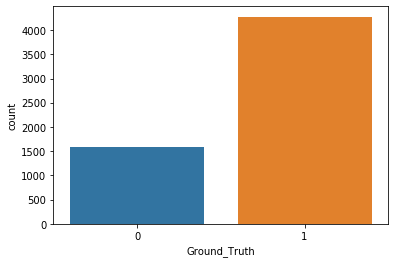

In [ ]:
import seaborn as sns
sns.countplot(df.Ground_Truth)

In [ ]:
df['Id']=df['Id'].apply(lambda x: str(x))

In [ ]:
df['Id']=df['Id'].apply(lambda x: x+'.jpeg')

In [ ]:
df.head()

,Id,Ground_Truth
0,643781546.jpeg,1
1,540270208.jpeg,0
2,585452583.jpeg,1
3,341665171.jpeg,0
4,940983956.jpeg,1


In [ ]:
zero = df.loc[df['Ground_Truth']==0]

In [ ]:
zero = pd.concat([zero]*2, ignore_index=True)

In [ ]:
x = pd.concat([df,zero], ignore_index=True)

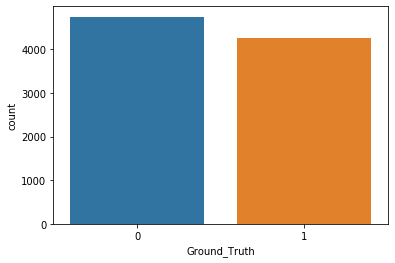

In [ ]:
sns.countplot(x['Ground_Truth'])

In [ ]:
y=x['Ground_Truth']

In [ ]:
img=x['Id']

In [ ]:
from os.path import join

image_dir = '/content/All/'
img_paths = [join(image_dir, filename) for filename in img]

In [ ]:
import cv2

img_paths[0]

'/content/All/643781546.jpeg'

In [ ]:
def read_and_prep_images(img_paths):
  img_array=np.array([cv2.addWeighted ((cv2.cvtColor((cv2.resize((cv2.imread(img)),(480,480))),cv2.COLOR_BGR2GRAY)),4, cv2.GaussianBlur((cv2.cvtColor((cv2.resize((cv2.imread(img)),(480,480))),cv2.COLOR_BGR2GRAY)), (0,0),480/10) ,-4 ,128) for img in img_paths])
  return img_array

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(img_paths,y,test_size=0.20)

In [ ]:
x_train[0:1]

['/content/All/235117813.jpeg']

In [ ]:
x_train = read_and_prep_images(x_train)


In [ ]:
x_test = read_and_prep_images(x_test)


In [ ]:
x_train=x_train/255


In [ ]:
x_test=x_test/255

In [ ]:
y_train.shape

(7217,)

In [ ]:
x_train.shape

(7217, 480, 480)

In [ ]:
x_test.shape

(1805, 480, 480)

In [ ]:
x_train=np.reshape(x_train, (7217,480,480,1))
x_train.shape

(7217, 480, 480, 1)

In [ ]:
x_test=np.reshape(x_test, (1805,480,480,1))
x_test.shape

(1805, 480, 480, 1)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, MaxPooling2D, Conv2D, Dropout


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(480, 480, 1)),
    MaxPooling2D(4, 4),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(4,4),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(4,4),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(4,4),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train,epochs=15,batch_size=80)

In [ ]:
predict = model.predict(x_test)

In [ ]:
model.evaluate(x_test, y_test)

1805/1805 [==============================] - 3s 2ms/step


[0.048513125734586895, 0.9795013850415513]

In [ ]:
from sklearn.externals import joblib

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('chest.pk1', 'wb'),protocol=2)

In [ ]:
model1 = pickle.load(open('chest.pk1','rb'))

In [ ]:

a=model1.predict(x_test[0:1])

In [ ]:
a=list(a)

In [ ]:
a

[array([0.00322698, 0.99677294], dtype=float32)]